# Program - AMcomm
Module for AM data communications with one frequenency channel for clock call with: python AMcomm.py
    
    -Gerald Schuller, August 2014

* **Import relevant modules.**

In [1]:
from numpy import *
import pyaudio
#Importiere meine Sound Library:
import sound
import matplotlib.pyplot as plt
from writereadbits import *

writereadbits.py


* **Define the variables:**

In [2]:
bitduration=0.1
FS = 16000.0
soundoutput = []

* **Function that modulates a 1 bit:**

In [3]:
def one():
    global soundoutput
    #x (Zeit-Achse) Wert mit 32000 Werten pro Sekunde, also fuer 0.1 
    #Sekunde Ton:
    x=arange(0,bitduration,1.0/FS)

    #frequenz: 1000 Hertz (Schwingungen pro Sekunde): Berechnung einer Sinus-Funktion
    # mit 1000 Perioden ueber 32000 x-Werten, als
    #Amplitudenwerte fuer den Lautsprecher fuer diese Frequenz und fuer
    #eine Abtastrate von 32000 Amplitudenwerten pro Sekunde. Fuer eine andere Frequenz muss dieser Wert 
    #veraendert werden, z.B. auf 10000 fuer 10000 Hertz:
    si=sin(pi*2*x*1000);

    #Clock frequenz 2000 Hz mit halber Laenge:
    x=arange(0,bitduration/2,1.0/FS);

    sic=sin(pi*2*x*2000);
    
    #append zeros of half bit duration:
    clocksig=append(sic,zeros(bitduration*0.5*FS));
    
    #combine the "1" and the clocksignal:
    #print(si.shape)
    #print(clocksig.shape)
    combined=(si+clocksig);
    #plt.plot(combined)
    #plt.show()
    #Die 20000 ist die Amplitude (Lautstaerke). Maximum ist 32000. Die 32000 ist die
    # Abtastrate, wievele
    #Amplitudenwerte pro sekunde and den Lautspecher gegeben werden:
    #sound.sound(combined*10000,32000)
    
    soundoutput=concatenate((soundoutput,combined*10000))

* **Function that modulates a 0 bit:**

In [4]:
def zero():
    "This function modulates a 0 bit"
    global soundoutput
    
    #Amplitude zero at 1000 Hz
    #Clock frequenz 2000 Hz mit halber Laenge:
    x = arange(0, bitduration / 2, 1.0/FS)

    sic = sin(pi * 2 * x * 2000);
    
    #append zeros of half bit duration:
    clocksig=append(sic,zeros(bitduration * 0.5 * FS))
    
    #sound.sound(clocksig*10000,32000)
    soundoutput = concatenate((soundoutput, clocksig * 10000))


sende 0
sende 1
sende 0
sende 1
sende 0
sende 1
sende 0
sende 0
sende 0
sende 1
sende 0
sende 1
sende 0
sende 1
sende 0
sende 1
sende 0
sende 0
sende 1
sende 0
sende 1
sende 1
sende 0
sende 1
sende 0
sende 1
sende 0
sende 0
sende 1
sende 0
sende 0
sende 1
sende 0
sende 1
sende 1
sende 0
sende 1
sende 1
sende 0
sende 0
sende 0
sende 1
sende 1
sende 0
sende 1
sende 1
sende 0
sende 1
sende 0
sende 1
sende 1
sende 0
sende 0
sende 1
sende 0
sende 1
sende 0
sende 1
sende 1
sende 0
sende 1
sende 1
sende 1
sende 0
sende 0
sende 1
sende 1
sende 0
sende 0
sende 0
sende 0
sende 1
sende 0
sende 1
sende 1
sende 1
sende 0
sende 1
sende 0
sende 1
sende 0
sende 0
sende 0
sende 0
sende 1
sende 0
sende 1
sende 0
('geschriebene bits: ', 88)


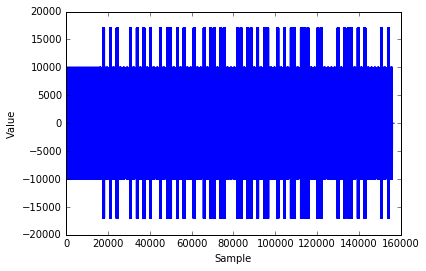

In [5]:
if __name__ == '__main__':
 
    #Write example bit string into file (for instance from an encoder):
    writebinaryfile('test.bin', '1010101011111111')

    #read bits from file, AM modulate them, and write modulated sound to sound file:
    #produce AM modulation:
    #1 Sekunde Vor-Ton 1000 Hz ohne clock SIgnal, zum Einpendeln der Verstaerkungsregelung bei der Aufnahme:
    x=arange(0,1,1.0/FS)
    soundoutput=sin(pi*2*x*1000)*10000;
    
    #Read to be transmitted bits from binary file:
    #bitstring=readbinaryfile('y00enc.bin')
    #bitstring=readbinaryfile('test.bin')
    #Try text file:
    bitstring=readbinaryfile('test.txt')
    
    #AM modulation for the bits:
    for bit in bitstring:
        if bit == '1':
            one();
            print("sende 1")
        else:
            zero();
            print("sende 0")

    #write AM modulated sound to file:
    sound.wavwrite(soundoutput,FS,"amfile.wav")
    print("geschriebene bits: ", len(bitstring))

    fig=plt.figure()
    fig.canvas.set_window_title('Erzeugtes AM Signal')
    plt.plot(soundoutput)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.show()